# Docking Risperidone Against DRD2 - DOCKSTRING Tutorial

In this tutorial we will dock risperidone against dopamine receptor DRD2 using DOCKSTRING.

## 1. Introduction

DRD2 is a G protein-coupled receptor (GPCR) of dopamine that plays a key role in neural signalling
and is an interesting target for ML research for several reasons:

- Medical relevance: even though dopamine receptors are relatively scarce in the brain, they are involved in many processes such as memory, motor behaviour or reward. Furthermore, abnormal levels of DRD2 have been linked to grave pathologies such as Alzheimer's disease _[Pan et al., 2019]_ or schizophrenia _[McCutcheon et al., 2019]_. DRD2 is the target of many antipsychotic drugs, including risperidone.
- Characterization: the structure of DRD2 has been characterized experimentally, including the binding with risperidone _[Wang et al., 2018]_.
- Benchmark: DRD2 has been used as an example target for _de novo_ molecular generation in the ML literature _[Olivecrona et al., 2017, Arús-Pous et al., 2020]_.

Risperidone (sold under the brand name Risperdal) is an antipsychotic small-molecule drug used to treat schizophrenia and bipolar disorder.

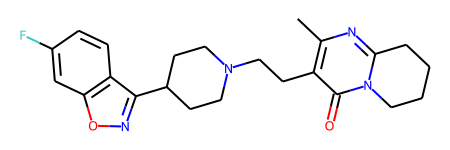

In [1]:
import rdkit.Chem as Chem

smiles = 'CC1=C(C(=O)N2CCCCC2=N1)CCN3CCC(CC3)C4=NOC5=C4C=CC(=C5)F'
Chem.MolFromSmiles(smiles)

## 2. Docking with DOCKSTRING

Docking with the DOCKSTRING Python package takes just three lines.

In [2]:
from dockstring import load_target

target = load_target('DRD2')
score, aux = target.dock(smiles)

The first return value is the best score found by Autodock Vina.

In [3]:
score

-11.9

The second return value is a dictionary containing all the scores found by Autodock Vina, as well as the pose of the best score.
The pose is given as a RDKit molecule.

In [4]:
aux

{'ligand': <rdkit.Chem.rdchem.Mol at 0x7f666ce0f9a0>,
 'affinities': [-11.9, -11.8, -11.6, -11.1, -10.7, -10.4, -10.3, -10.3, -10.0]}

By default, DOCKSTRING uses preconfigured preparation and docking options that are reasonable across a range of protein targets.
Optionally, users may provide the following arguments:
- `pH`: the desired pH for ligand protonation. The default pH is 7.4 (physiological pH).
- `num_cpus`: number of CPUs used by Autodock Vina.

## 3. Comparison with Experimental Results

This histogram shows all DRD2 scores in the DOCKSTRING dataset, consisting of roughly 260k molecules (more negative is better).
The score obtained by risperidone is comparable to the best scores in the dataset,
indicating that Autodock Vina predicts likely binding to DRD2.

<img src="figures/DRD2_scores.png">

This makes sense, since risperidone is a known binder.

## 4. Viewing the Pose

DOCKSTRING also provides functionality to view the docking pose in PyMol.

In [5]:
target.view([aux['ligand']])

CompletedProcess(args=['pymol', PosixPath('/home/user/miniconda3/envs/dockstring/lib/python3.9/site-packages/dockstring/resources/targets/DRD2_target.pdb'), PosixPath('/home/user/miniconda3/envs/dockstring/lib/python3.9/site-packages/dockstring/resources/view_search_box.py'), '-d', 'view_search_box center_x=9.25, center_y=6.167, center_z=-7.0, size_x=30.0, size_y=30.0, size_z=32.0', '/tmp/tmp1xlpkx8u/ligand_0.mol'], returncode=0)

Interestingly, the pose produced by Autodock Vina is very similar to the experimental pose found in the crystal _[Wang et al., 2018]_.
You can load the crystal pose in PyMol with

`File > Open: data/risperidone_from_crystal.pdb`

## References

**[Arús-Pous et al., 2020]** Arús-Pous, J., Patronov, A., Bjerrum, E. J., Tyrchan, C., Reymond, J.-L., Chen,
H., and Engkvist, O. (2020). SMILES-based deep generative scaffold decorator for de-novo drug design.
J. Cheminf., 12(1):1–18.
<br>
**[McCutcheon et al., 2019]** McCutcheon, R. A., Abi-Dargham, A., and Howes, O. D. (2019). Schizophrenia,
Dopamine and the Striatum: From Biology to Symptoms. Trends Neurosci., 42(3):205–220.
<br>
**[Olivecrona et al., 2017]** Olivecrona, M., Blaschke, T., Engkvist, O., and Chen, H. (2017). Molecular de-novo
design through deep reinforcement learning. J. Cheminf., 9(1):1–14.
<br>
**[Pan et al., 2019]** Pan, X., Kaminga, A. C., Wen, S. W., Wu, X., Acheampong, K., and Liu, A. (2019).
Dopamine and Dopamine Receptors in Alzheimer’s Disease: A Systematic Review and Network Meta-
Analysis. Front. Aging Neurosci., 11.
<br>
**[Wang et al., 2018]** Wang, S., Che, T., Levit, A., Shoichet, B. K., Wacker, D., and Roth, B. L. (2018).
Structure of the D2 dopamine receptor bound to the atypical antipsychotic drug risperidone. Nature,
555(7695):269–273.